# HEART DISEASE

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Asus\Downloads\heart_disease_dataset.csv')

# DATA ANALYSING

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.shape

(918, 12)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
graph=df.select_dtypes('float')
graph

,Oldpeak
0,0.0
1,1.0
2,0.0
3,1.5
4,0.0
...,...
913,1.2
914,3.4
915,1.2
916,0.0


array([[<Axes: title={'center': 'Oldpeak'}>]], dtype=object)

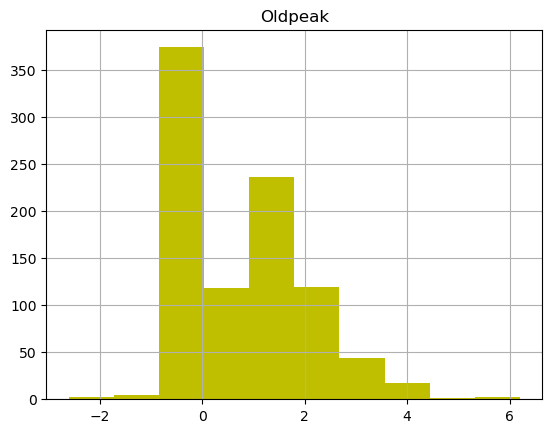

In [11]:
graph.hist(color='y')

In [12]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [13]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# DATA CLEANING

Text(0.5, 1.0, 'MaxHR')

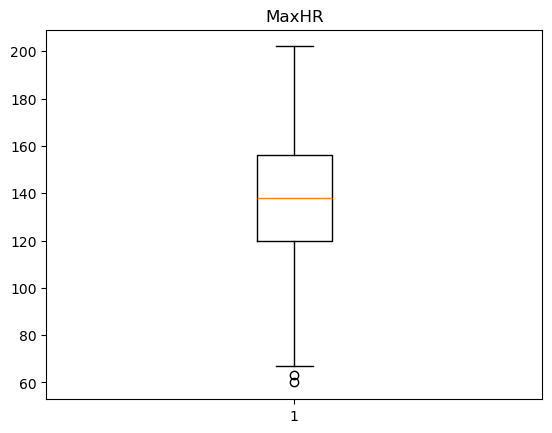

In [14]:
plt.boxplot(df['MaxHR'])
plt.title('MaxHR')

In [15]:
Q1=np.percentile(df['MaxHR'],25,interpolation='midpoint')
Q2=np.percentile(df['MaxHR'],50,interpolation='midpoint')
Q3=np.percentile(df['MaxHR'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

120.0
138.0
156.0


In [16]:
IQR=Q3-Q1
IQR

36.0

In [17]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit)
print(lower_limit)

210.0
66.0


In [18]:
outlier=[]
for i in df['MaxHR']:
    if((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
outlier

[63, 60]

In [19]:
df1=((df['MaxHR']>upper_limit)|(df['MaxHR']<lower_limit))
df1

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: MaxHR, Length: 918, dtype: bool

In [20]:
df.loc[df1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


In [21]:
df.loc[df1].index

Index([370, 390], dtype='int64')

In [22]:
df1=df.loc[df1].index

In [23]:
df.drop(df1,axis=0,inplace=True)

In [24]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [25]:
df=df.reset_index(drop=True)

In [26]:
df.shape

(916, 12)

# DATA TRANSFORMING

In [27]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
912,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
913,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
914,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [28]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
enc=df.select_dtypes(include=['object'])
enc

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
911,M,TA,Normal,N,Flat
912,M,ASY,Normal,N,Flat
913,M,ASY,Normal,Y,Flat
914,F,ATA,LVH,N,Flat


In [32]:
for i in ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']:
    df[i]=le.fit_transform(df[i])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,45,1,3,110,264,0,1,132,0,1.2,1,1
912,68,1,0,144,193,1,1,141,0,3.4,1,1
913,57,1,0,130,131,0,1,115,1,1.2,1,1
914,57,0,1,130,236,0,0,174,0,0.0,1,1


In [33]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [34]:
df.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

# DATA SCALING

In [35]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [36]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [37]:
x = df.drop(['Oldpeak'],axis=1)
y = df['Oldpeak']

In [38]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,2,0
1,49,0,2,160,180,0,1,156,0,1,1
2,37,1,1,130,283,0,2,98,0,2,0
3,48,0,0,138,214,0,1,108,1,1,1
4,54,1,2,150,195,0,1,122,0,2,0


In [39]:
y.head()

0    0.0
1    1.0
2    0.0
3    1.5
4    0.0
Name: Oldpeak, dtype: float64

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
minmax = MinMaxScaler()

In [42]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [43]:
a=minmax.fit_transform(x)
a

array([[0.24489796, 1.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.42857143, 0.        , 0.66666667, ..., 0.        , 0.5       ,
        1.        ],
       [0.18367347, 1.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.59183673, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.59183673, 0.        , 0.33333333, ..., 0.        , 0.5       ,
        1.        ],
       [0.20408163, 1.        , 0.66666667, ..., 0.        , 1.        ,
        0.        ]])

In [53]:
a= pd.DataFrame(x,columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina','ST_Slope',
       'HeartDisease'])
a

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,2,0
1,49,0,2,160,180,0,1,156,0,1,1
2,37,1,1,130,283,0,2,98,0,2,0
3,48,0,0,138,214,0,1,108,1,1,1
4,54,1,2,150,195,0,1,122,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
911,45,1,3,110,264,0,1,132,0,1,1
912,68,1,0,144,193,1,1,141,0,1,1
913,57,1,0,130,131,0,1,115,1,1,1
914,57,0,1,130,236,0,0,174,0,1,1


In [51]:
output=pd.concat([a,y],axis=1)
output

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease,Oldpeak
0,40,1,1,140,289,0,1,172,0,2,0,0.0
1,49,0,2,160,180,0,1,156,0,1,1,1.0
2,37,1,1,130,283,0,2,98,0,2,0,0.0
3,48,0,0,138,214,0,1,108,1,1,1,1.5
4,54,1,2,150,195,0,1,122,0,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
911,45,1,3,110,264,0,1,132,0,1,1,1.2
912,68,1,0,144,193,1,1,141,0,1,1,3.4
913,57,1,0,130,131,0,1,115,1,1,1,1.2
914,57,0,1,130,236,0,0,174,0,1,1,0.0


In [46]:
output.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease,Oldpeak
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,53.506550,0.789301,0.782751,132.385371,199.233624,0.233624,0.989083,136.973799,0.403930,1.361354,0.552402,0.888755
std,9.440117,0.408028,0.956866,18.532469,109.107607,0.423367,0.632361,25.243154,0.490952,0.607235,0.497518,1.067254
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,-2.600000
25%,47.000000,1.000000,0.000000,120.000000,174.750000,0.000000,1.000000,120.000000,0.000000,1.000000,0.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,1.000000,1.000000,0.600000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,2.000000,1.000000,1.500000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,2.000000,1.000000,6.200000


# DATA VISUALISING

C:\Users\Asus\AppData\Local\Temp\ipykernel_30640\4208885765.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output['Sex'])


<Axes: xlabel='Sex', ylabel='Density'>

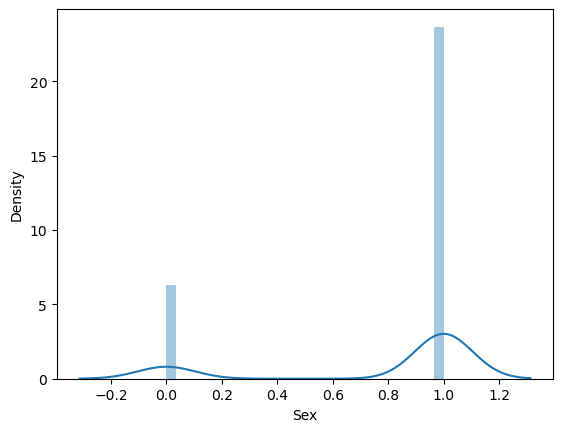

In [47]:
sns.distplot(output['Sex'])

<Axes: xlabel='HeartDisease', ylabel='Density'>

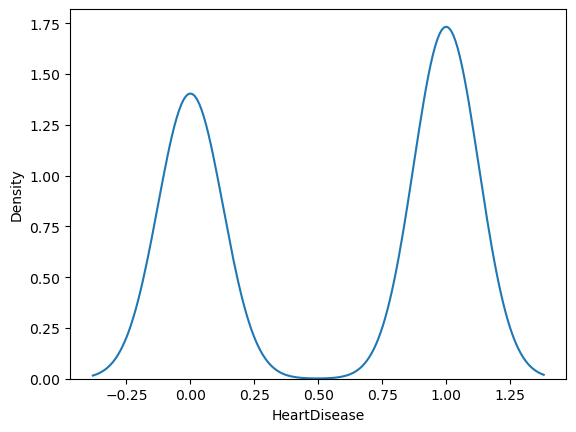

In [48]:
sns.kdeplot(df['HeartDisease'])

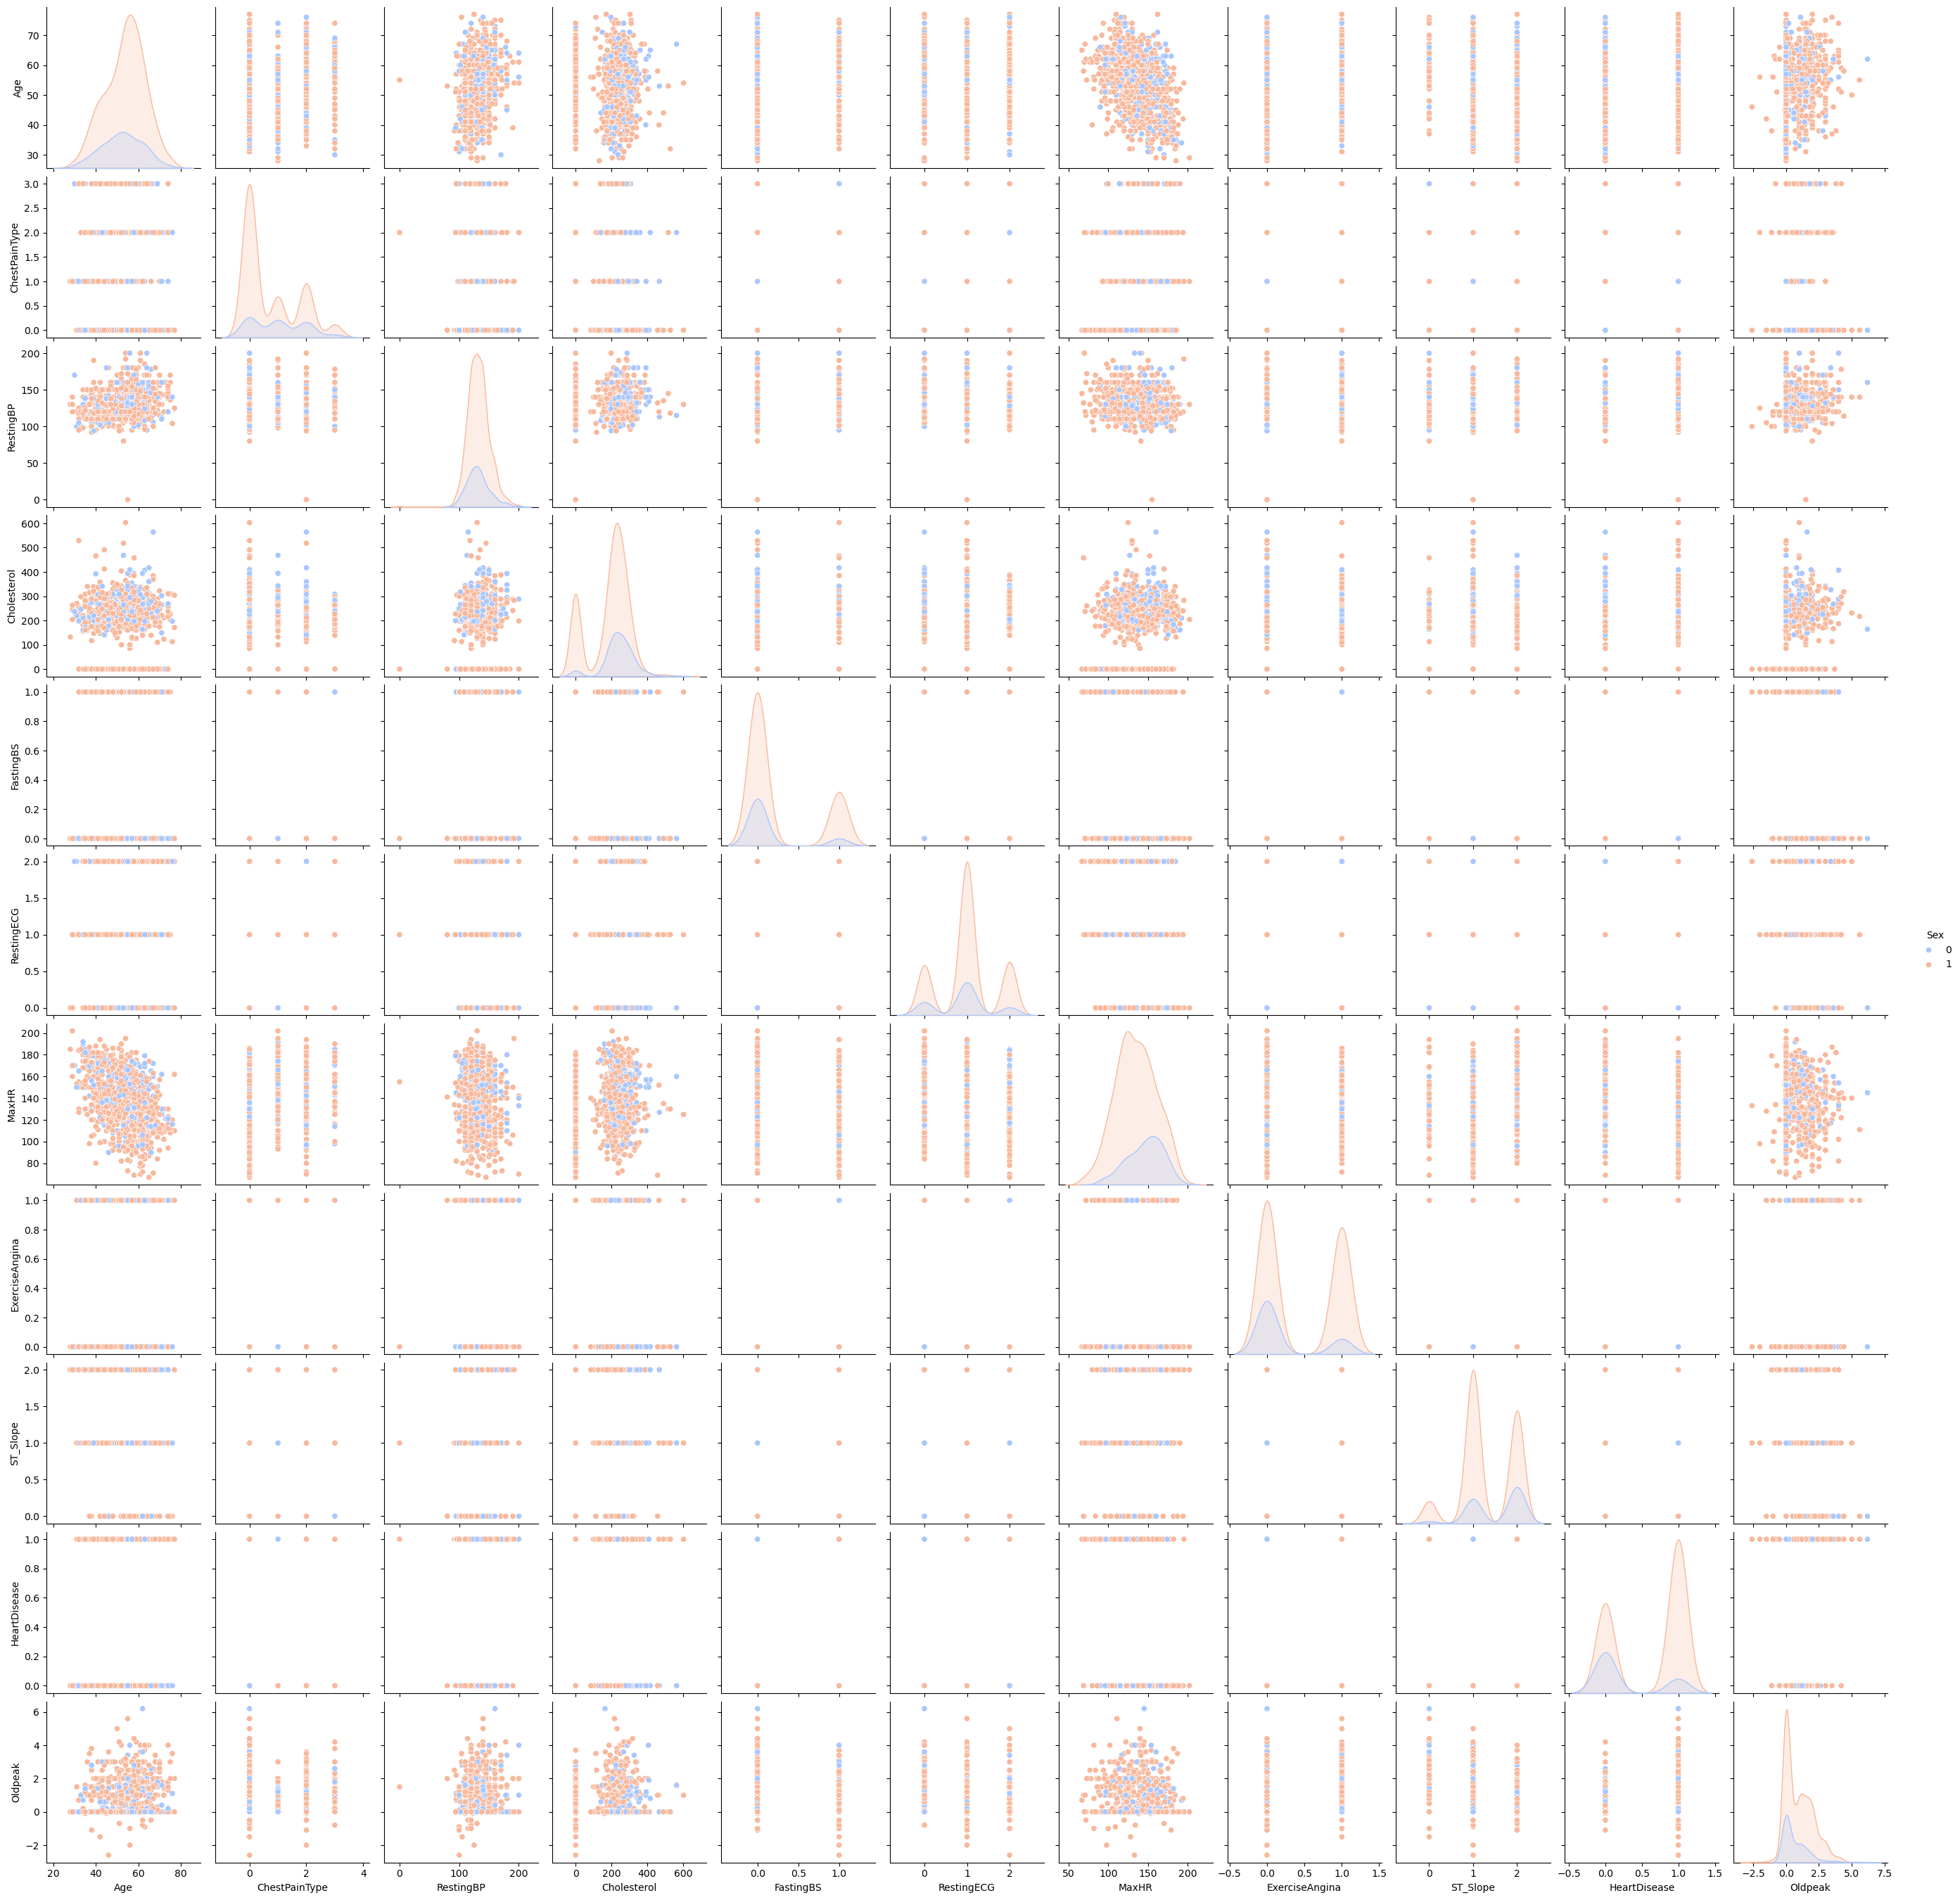

In [49]:
sns.pairplot(output,hue='Sex',palette='coolwarm')